COVID-19 BRASIL 25/02/2020  -  27/03/2022

In [71]:
#importando bibliotecas
import pandas as pd
from datetime import datetime
import statistics as sts
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#importando dados
dados = pd.read_csv("caso.csv", sep = ",")

In [73]:
dados.loc[(dados['place_type'] == 'state') & (dados['is_last'] == True)].shape

(27, 13)

In [74]:
dados['date'] = pd.to_datetime(dados['date'])

In [75]:
dados.loc[(dados['place_type'] == 'state')& (dados['is_last'] == True)].sum()

C:\Users\Hennrick\AppData\Local\Temp\ipykernel_19660\432190252.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



state                             APACAMALDFESCEBAMSMAGOMTPAPEPBPIRJMGRNRRROPRSE...
city                                                                              0
place_type                        statestatestatestatestatestatestatestatestates...
confirmed                                                                  29849740
deaths                                                                       659159
order_for_place                                                               19762
is_last                                                                          27
estimated_population_2019                                               210147125.0
estimated_population                                                    211755692.0
city_ibge_code                                                                786.0
confirmed_per_100k_inhabitants                                         429913.27636
death_rate                                                                  

selecionando apenas o último registro de cada mês.

In [76]:
agrupados_by_month = dados.loc[((((dados['date'].dt.day == 31) & ((dados['date'].dt.month == 1)|(dados['date'].dt.month == 3)|
                               (dados['date'].dt.month == 5)|(dados['date'].dt.month == 7)|(dados['date'].dt.month == 8)|
                               (dados['date'].dt.month == 10)|(dados['date'].dt.month == 12)) & (dados['date'].dt.year == 2021))) |
                               (((dados['date'].dt.day == 30) & ((dados['date'].dt.month == 4)|(dados['date'].dt.month == 6)|
                               (dados['date'].dt.month == 9)|(dados['date'].dt.month == 11))) & (dados['date'].dt.year == 2021))|
                               (((dados['date'].dt.day == 28) & (dados['date'].dt.month == 2)) & (dados['date'].dt.year == 2021))|
                           (((dados['date'].dt.day == 31) & ((dados['date'].dt.month == 1)|
                               (dados['date'].dt.month == 5)|(dados['date'].dt.month == 7)|(dados['date'].dt.month == 8)|
                               (dados['date'].dt.month == 10)|(dados['date'].dt.month == 12))) & (dados['date'].dt.year == 2022)) |
                               (((dados['date'].dt.day == 30) & ((dados['date'].dt.month == 4)|(dados['date'].dt.month == 6)|
                               (dados['date'].dt.month == 9)|(dados['date'].dt.month == 11))) & (dados['date'].dt.year == 2022))|
                               (((dados['date'].dt.day == 28) & (dados['date'].dt.month == 2)) & (dados['date'].dt.year == 2022))|
                                ((dados['is_last'] == True) & (dados['date'].dt.month == 3) & (dados['date'].dt.year == 2022))| 
                              (((dados['date'].dt.day == 31) & ((dados['date'].dt.month == 1)|(dados['date'].dt.month == 3)|
                               (dados['date'].dt.month == 5)|(dados['date'].dt.month == 7)|(dados['date'].dt.month == 8)|
                               (dados['date'].dt.month == 10)|(dados['date'].dt.month == 12))) & (dados['date'].dt.year == 2020)) |
                               (((dados['date'].dt.day == 30) & ((dados['date'].dt.month == 4)|(dados['date'].dt.month == 6)|
                               (dados['date'].dt.month == 9)|(dados['date'].dt.month == 11))) & (dados['date'].dt.year == 2020))|
                               ((dados['date'].dt.day == 28) & (dados['date'].dt.month == 2) & (dados['date'].dt.year == 2020)))].copy()

selecionando apenas os estados

In [77]:
selecao = agrupados_by_month.loc[agrupados_by_month['place_type'] == 'state'].copy()



In [78]:
selecao.reset_index(inplace=True)

In [79]:
selecao.drop(['index'], axis = 1, inplace = True)

In [80]:
selecao.sort_values(['date'])

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
665,2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000
467,2020-03-31,RN,NaN,state,82,1,14,False,3506853.0,3534165.0,24.0,2.32021,0.0122
96,2020-03-31,AL,NaN,state,18,1,21,False,3337357.0,3351543.0,27.0,0.53707,0.0556
320,2020-03-31,PA,NaN,state,34,0,14,False,8602865.0,8690745.0,15.0,0.39122,0.0000
491,2020-03-31,RR,NaN,state,16,0,11,False,605761.0,631181.0,14.0,2.53493,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2022-03-27,CE,NaN,state,1239746,26708,728,True,9132078.0,9187103.0,23.0,13494.41712,0.0215
121,2022-03-27,ES,NaN,state,1037188,14323,750,True,4018650.0,4064052.0,32.0,25521.03172,0.0138
567,2022-03-27,SC,NaN,state,1671175,21648,746,True,7164788.0,7252502.0,42.0,23042.73753,0.0130
492,2022-03-27,RO,NaN,state,391943,7172,717,True,1777225.0,1796460.0,11.0,21817.51890,0.0183


In [81]:
selecao['mes'] = selecao['date'].dt.month
selecao['ano'] = selecao['date'].dt.year

Nota-se que temos alguns estados faltando em em alguns meses

In [82]:
selecao.groupby(['mes', 'ano']).size()

mes  ano 
1    2021    27
     2022    27
2    2020     1
     2021    27
     2022    25
3    2020    27
     2021    27
     2022    27
4    2020    27
     2021    26
5    2020    27
     2021    27
6    2020    27
     2021    27
7    2020    27
     2021    27
8    2020    27
     2021    27
9    2020    27
     2021    27
10   2020    25
     2021    26
11   2020    27
     2021    26
12   2020    27
     2021    24
dtype: int64

In [83]:
selecao.loc[(selecao['mes'] == 3) & (selecao['ano'] == 2022)]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mes,ano
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132,3,2022
25,2022-03-27,AC,NaN,state,123808,1992,722,True,881935.0,894470.0,12.0,13841.49273,0.0161,3,2022
48,2022-03-27,AM,NaN,state,581070,14151,739,True,4144597.0,4207714.0,13.0,13809.63630,0.0244,3,2022
72,2022-03-26,AL,NaN,state,295972,6869,746,True,3337357.0,3351543.0,27.0,8830.91758,0.0232,3,2022
97,2022-03-25,DF,NaN,state,691353,11573,705,True,3015268.0,3055149.0,53.0,22629.10909,0.0167,3,2022
121,2022-03-27,ES,NaN,state,1037188,14323,750,True,4018650.0,4064052.0,32.0,25521.03172,0.0138,3,2022
146,2022-03-27,CE,NaN,state,1239746,26708,728,True,9132078.0,9187103.0,23.0,13494.41712,0.0215,3,2022
171,2022-03-27,BA,NaN,state,1530054,29658,746,True,14873064.0,14930634.0,29.0,10247.74969,0.0194,3,2022
196,2022-03-26,MS,NaN,state,523565,10486,722,True,2778986.0,2809394.0,50.0,18636.22546,0.0200,3,2022
221,2022-03-27,MA,NaN,state,424199,10869,736,True,7075181.0,7114598.0,21.0,5962.37482,0.0256,3,2022


12 - 21= ac to rr
11 - 21 = df
10 - 21 = ac
10 - 2020 = mg rn
04 - 2021 = rn
02 - 2022 = to am

In [84]:
faltantes = dados.loc[(dados['place_type'] == 'state') & (dados['state'] == 'AC') & (dados['date'].dt.year == 2021) &
          (((dados['date'].dt.month == 12)&(dados['date'].dt.day == 30))|((dados['date'].dt.month == 10)& (dados['date'].dt.day==29)))].copy()

In [85]:
faltantes

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
10296,2021-12-30,AC,NaN,state,88384,1851,643,False,881935.0,894470.0,12.0,9881.15867,0.0209
10347,2021-10-29,AC,NaN,state,88050,1845,592,False,881935.0,894470.0,12.0,9843.81813,0.0210


In [124]:
faltantes_2 = dados.loc[((dados['place_type'] == 'state') & (dados['state'] == 'RR')&
          (dados['date'].dt.year == 2021) & (dados['date'].dt.month == 12) & (dados['date'].dt.day == 30))|
         ((dados['place_type'] == 'state') & (dados['state'] == 'TO')&
          (dados['date'].dt.year == 2021) & (dados['date'].dt.month == 12) & (dados['date'].dt.day == 29))].copy()

In [87]:
faltantes_3 = dados.loc[(dados['place_type'] == 'state') & (dados['state'] == 'DF')&
          (dados['date'].dt.year == 2021) & (dados['date'].dt.month == 11) & (dados['date'].dt.day == 29)].copy()

In [88]:
faltantes_4 = dados.loc[(dados['place_type'] == 'state') & ((dados['state'] == 'MG')|(dados['state'] == 'RN'))&
          (dados['date'].dt.year == 2020) & (dados['date'].dt.month == 10) & (dados['date'].dt.day == 30)].copy()

In [89]:
faltantes_5 = dados.loc[(dados['place_type'] == 'state') & (dados['state'] == 'RN') &
          (dados['date'].dt.year == 2021) & (dados['date'].dt.month == 4) & (dados['date'].dt.day == 29)].copy()

In [90]:
faltantes_6 = dados.loc[(dados['place_type'] == 'state') & ((dados['state'] == 'TO')|(dados['state'] == 'AM')) &
          (dados['date'].dt.year == 2022) & (dados['date'].dt.month == 2)&(dados['date'].dt.day == 27)].copy()

In [91]:
faltam = [faltantes, faltantes_2, faltantes_3, faltantes_4, faltantes_5, faltantes_6]


In [92]:
faltantes_geral = pd.concat(faltam)

In [93]:
data = ['31-12-2021', '31-10-2021', '30-11-2021', '31-10-2020', '30-04-2021', '28-02-2022', '27-03-2022']
datas = pd.to_datetime(data, dayfirst=True)
datas



DatetimeIndex(['2021-12-31', '2021-10-31', '2021-11-30', '2020-10-31',
               '2021-04-30', '2022-02-28', '2022-03-27'],
              dtype='datetime64[ns]', freq=None)

In [94]:
faltantes_geral['mes'] = faltantes_geral['date'].dt.month
faltantes_geral['ano'] = faltantes_geral['date'].dt.year

In [95]:
faltantes_geral.loc[(faltantes_geral['mes'] == 12) & (faltantes_geral['ano']== 2021), 'date'] = datas[0]
faltantes_geral.loc[(faltantes_geral['mes'] == 10) & (faltantes_geral['ano']== 2021), 'date'] = datas[1]
faltantes_geral.loc[(faltantes_geral['mes'] == 11) & (faltantes_geral['ano']== 2021), 'date'] = datas[2]
faltantes_geral.loc[(faltantes_geral['mes'] == 10) & (faltantes_geral['ano']== 2020), 'date'] = datas[3]
faltantes_geral.loc[(faltantes_geral['mes'] == 4) & (faltantes_geral['ano']== 2021), 'date'] = datas[4]
faltantes_geral.loc[(faltantes_geral['mes'] == 2) & (faltantes_geral['ano']== 2022), 'date'] = datas[5]

In [96]:
faltantes_geral

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mes,ano
10296,2021-12-31,AC,NaN,state,88384,1851,643,False,881935.0,894470.0,12.0,9881.15867,0.0209,12,2021
10347,2021-10-31,AC,NaN,state,88050,1845,592,False,881935.0,894470.0,12.0,9843.81813,0.0210,10,2021
1674770,2021-12-31,RR,NaN,state,129086,2078,637,False,605761.0,631181.0,14.0,20451.50282,0.0161,12,2021
2142638,2021-12-31,TO,NaN,state,235558,3939,623,False,1572866.0,1590248.0,17.0,14812.65815,0.0167,12,2021
129980,2021-11-30,DF,NaN,state,517746,11035,623,False,3015268.0,3055149.0,53.0,16946.66938,0.0213,11,2021
1295170,2020-10-31,MG,NaN,state,358971,9015,236,False,21168791.0,21292666.0,31.0,1685.89034,0.0251,10,2020
1594940,2020-10-31,RN,NaN,state,81518,2586,208,False,3506853.0,3534165.0,24.0,2306.57029,0.0317,10,2020
1594779,2021-04-30,RN,NaN,state,224880,5506,369,False,3506853.0,3534165.0,24.0,6363.03059,0.0245,4,2021
22701,2022-02-28,AM,NaN,state,573515,14116,712,False,4144597.0,4207714.0,13.0,13630.08512,0.0246,2,2022
2142589,2022-02-28,TO,NaN,state,298473,4109,672,False,1572866.0,1590248.0,17.0,18768.95931,0.0138,2,2022


In [97]:
df = [selecao, faltantes_geral]
new_selecao = pd.concat(df)

In [98]:
new_selecao.groupby(['mes', 'ano']).size()

mes  ano 
1    2021    27
     2022    27
2    2020     1
     2021    27
     2022    27
3    2020    27
     2021    27
     2022    27
4    2020    27
     2021    27
5    2020    27
     2021    27
6    2020    27
     2021    27
7    2020    27
     2021    27
8    2020    27
     2021    27
9    2020    27
     2021    27
10   2020    27
     2021    27
11   2020    27
     2021    27
12   2020    27
     2021    27
dtype: int64

In [99]:
new_selecao.loc[new_selecao['is_last'] == True]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mes,ano
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132,3,2022
25,2022-03-27,AC,NaN,state,123808,1992,722,True,881935.0,894470.0,12.0,13841.49273,0.0161,3,2022
48,2022-03-27,AM,NaN,state,581070,14151,739,True,4144597.0,4207714.0,13.0,13809.63630,0.0244,3,2022
72,2022-03-26,AL,NaN,state,295972,6869,746,True,3337357.0,3351543.0,27.0,8830.91758,0.0232,3,2022
97,2022-03-25,DF,NaN,state,691353,11573,705,True,3015268.0,3055149.0,53.0,22629.10909,0.0167,3,2022
121,2022-03-27,ES,NaN,state,1037188,14323,750,True,4018650.0,4064052.0,32.0,25521.03172,0.0138,3,2022
146,2022-03-27,CE,NaN,state,1239746,26708,728,True,9132078.0,9187103.0,23.0,13494.41712,0.0215,3,2022
171,2022-03-27,BA,NaN,state,1530054,29658,746,True,14873064.0,14930634.0,29.0,10247.74969,0.0194,3,2022
196,2022-03-26,MS,NaN,state,523565,10486,722,True,2778986.0,2809394.0,50.0,18636.22546,0.0200,3,2022
221,2022-03-27,MA,NaN,state,424199,10869,736,True,7075181.0,7114598.0,21.0,5962.37482,0.0256,3,2022


In [100]:
new_selecao.reset_index(inplace=True)

In [101]:
new_selecao.drop(['index'], axis = 1, inplace = True)

In [102]:
new_selecao.loc[new_selecao['is_last'] == True].sum()

C:\Users\Hennrick\AppData\Local\Temp\ipykernel_19660\3219302836.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



state                             APACAMALDFESCEBAMSMAGOMTPAPEPBPIRJMGRNRRROPRSE...
city                                                                              0
place_type                        statestatestatestatestatestatestatestatestates...
confirmed                                                                  29849740
deaths                                                                       659159
order_for_place                                                               19762
is_last                                                                          27
estimated_population_2019                                               210147125.0
estimated_population                                                    211755692.0
city_ibge_code                                                                786.0
confirmed_per_100k_inhabitants                                         429913.27636
death_rate                                                                  

In [103]:
new_selecao.loc[(new_selecao['mes'] == 3) & (new_selecao['ano']== 2022), 'date'] = datas[6]

In [104]:
dados.loc[(dados['is_last'] == True)]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
734,2021-12-14,AP,Amapá,city,1424,13,586,True,9109.0,9187.0,1600105.0,15500.16327,0.0091
1320,2021-12-14,AP,Calçoene,city,1852,14,581,True,11117.0,11306.0,1600204.0,16380.68282,0.0076
1901,2021-12-14,AP,Cutias,city,874,7,577,True,5983.0,6101.0,1600212.0,14325.52041,0.0080
2478,2021-12-14,AP,Ferreira Gomes,city,1566,7,580,True,7780.0,7967.0,1600238.0,19656.08134,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835558,2021-12-06,SP,Águas de São Pedro,city,461,12,522,True,3451.0,3521.0,3500600.0,13092.87134,0.0260
2836080,2021-12-06,SP,Álvares Florence,city,626,16,473,True,3679.0,3647.0,3501202.0,17164.79298,0.0256
2836553,2021-12-06,SP,Álvares Machado,city,2507,79,504,True,24915.0,24998.0,3501301.0,10028.80230,0.0315
2837057,2021-12-06,SP,Álvaro de Carvalho,city,292,9,494,True,5227.0,5274.0,3501400.0,5536.59462,0.0308


In [105]:
new_selecao

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mes,ano
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132,3,2022
1,2022-02-28,AP,NaN,state,160096,2102,707,False,845731.0,861773.0,16.0,18577.51403,0.0131,2,2022
2,2022-01-31,AP,NaN,state,151958,2051,679,False,845731.0,861773.0,16.0,17633.18182,0.0135,1,2022
3,2021-12-31,AP,NaN,state,126981,2022,648,False,845731.0,861773.0,16.0,14734.85477,0.0159,12,2021
4,2021-11-30,AP,NaN,state,124649,2003,617,False,845731.0,861773.0,16.0,14464.24987,0.0161,11,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2020-10-31,MG,NaN,state,358971,9015,236,False,21168791.0,21292666.0,31.0,1685.89034,0.0251,10,2020
672,2020-10-31,RN,NaN,state,81518,2586,208,False,3506853.0,3534165.0,24.0,2306.57029,0.0317,10,2020
673,2021-04-30,RN,NaN,state,224880,5506,369,False,3506853.0,3534165.0,24.0,6363.03059,0.0245,4,2021
674,2022-02-28,AM,NaN,state,573515,14116,712,False,4144597.0,4207714.0,13.0,13630.08512,0.0246,2,2022


In [106]:
c = new_selecao[['date','confirmed','deaths']].groupby(['date']).sum().reset_index()
c

,date,confirmed,deaths
0,2020-02-28,2,0
1,2020-03-31,5824,202
2,2020-04-30,87126,5980
3,2020-05-31,516094,29367
4,2020-06-30,1412664,59791
5,2020-07-31,2670451,92727
6,2020-08-31,3914829,121618
7,2020-09-30,4817365,143964
8,2020-10-31,5537763,159972
9,2020-11-30,6341965,173268


In [107]:
c = c.melt(id_vars='date', value_vars=['confirmed', 'deaths'])

fig = px.area(c, x='date', y='value', color='variable')
fig.update_layout(title='COVID-19 no Brasil: Total de casos e numero de mortes',
                  xaxis_title='Data', yaxis_title='Numero de casos',legend_title='<b>COVID-19</b>',
                  legend=dict(x=0.02,y=0.98))
fig.show()

In [108]:
t= new_selecao.loc[new_selecao['is_last'] == True]
t= t[['confirmed', 'estimated_population', 'death_rate', 'state','confirmed_per_100k_inhabitants','deaths' ]]

### Nota-se que os estados com maiores populações tiveram maior numero de casos mas que alguns tiveram um bom indice de mortalidade baixo como Minas Gerais e Rio Grande do Sul, e tivemos também os com alto indice de mortalidade como São Paulo e Rio de Janeiro.
### Podemos ver também estados com baixo numero de casos mas que com indice de mortalidade alto como Maranhão e Pernambuco.

In [109]:
fig = px.scatter(t, x="estimated_population", y="confirmed", title="COVID-19 no Brasil: População estimada x numero de casos por estado x indice de mortalidade",
                 size="confirmed", color="death_rate",hover_name=t.state, log_x=True, log_y=True, size_max=60)
fig.show()

### No grafico abaixo vemos que o alto numero de casos nao condiz com o indice de contagio dos estados. 
### Exemplos claros disso são os estados de São Paulo e Espirito Santo.

In [110]:
fig = px.scatter(t, x="estimated_population", y="confirmed", title="COVID-19 no Brasil: População estimada x numero de casos por estado x casos por 100 mil habitantes",
                 size="confirmed", color="confirmed_per_100k_inhabitants",hover_name=t.state, log_x=True, log_y=True, size_max=60)
fig.show()

### No grafico abaixo vemos como o covid éuma doença de contagio exponencial e o crescimento de casos por estado.

In [111]:
h = new_selecao.sort_values(['date','state'])
fig = go.Figure(data=go.Heatmap(
        z=h['confirmed_per_100k_inhabitants'],
        x=h['date'],
        y=h['state'],
        colorscale='Viridis'))

fig.update_layout(
    title='COVID-19 no Brasil: Casos x Tempo', xaxis_nticks=45, width=1000, height=700)

fig.show()

### No grafico abaixo verificamos que com  o avanço da ciencia e melhora nos tratamentos o indice de mortalidade foi baixando.

In [112]:
h = new_selecao[(new_selecao['confirmed'] >= 50)].sort_values(['date','state'])
fig = go.Figure(data=go.Heatmap(
        z=h['death_rate'],
        x=h['date'],
        y=h['state'],
        colorscale='Viridis'))

fig.update_layout(
    title='COVID-19 no Brasil: Indice de mortalidade x Tempo', xaxis_nticks=45, width=1000, height=700)

fig.show()

In [113]:
t = t.sort_values('confirmed')

In [114]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=t['state'], y=t['confirmed']),
    go.Bar(name='Deaths', x=t['state'], y=t['deaths'])
])
fig.update_layout(barmode='stack', title="COVID-19 in Brazil: caso.csvs e mortes por estado", 
                  xaxis_title="Estados", yaxis_title="Confirmados", legend_title='<b>COVID-19</b>',
                  legend=dict(x=0.75,y=0.5), width=1000, height=900)
fig.show()

In [115]:
quant = new_selecao.loc[new_selecao['is_last'] == True].copy()


In [116]:
ultimo = new_selecao.loc[new_selecao['is_last'] == True].copy()

In [117]:
quant = quant[['confirmed', 'deaths', 'order_for_place', 'estimated_population','death_rate']]

### na tabela abaixo tentei identificar uma correlção forte entre algumas variaveis. tivemos apenas uma forte que é dada entre confirmados e mortes.

### obs: coloquei de 0 a 1 pois nenhuma ficou inversamente proporcional a outra portando melhora a visualização

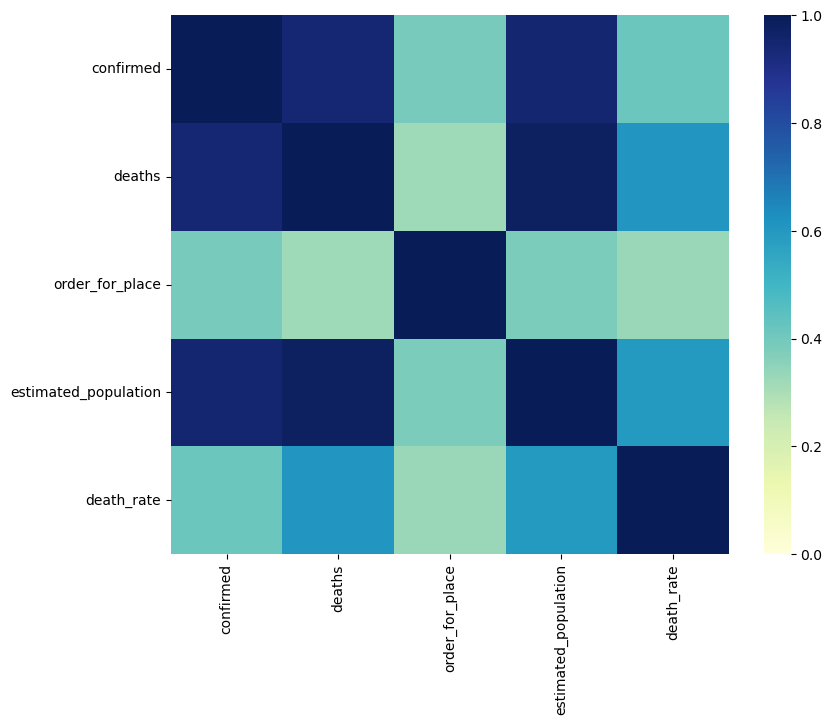

In [126]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(quant.corr(), vmin=0, cmap='YlGnBu')
plt.show();

### nesses boxplots abaixo podemos visualizar alguns dados estatisticos importantes. nesse grafico podemos observar que usar media como medida referencia para o numero de casos nao seria correto devido a grande dispersão dos dados, a mediana seria mais adequada.

In [119]:
fig = px.box(ultimo['confirmed'])
fig.update_layout( title="COVID-19 in Brazil: Boxplot casos", 
                  xaxis_title="Brasil", yaxis_title="Confirmados", legend_title='<b>COVID-19</b>',
                  legend=dict(x=0.75,y=0.5), width=900, height=600)
fig.show()

In [120]:
fig = px.box(ultimo['deaths'])
fig.update_layout( title="COVID-19 in Brazil: Boxplot mortes", 
                  xaxis_title="Brasil", yaxis_title="Mortes", legend_title='<b>COVID-19</b>',
                  legend=dict(x=0.75,y=0.5), width=900, height=600)
fig.show()

MEDIA PARA MORTOS E CONFIRMADOS

In [121]:
quant[['confirmed', 'deaths']].mean()

confirmed    1.105546e+06
deaths       2.441330e+04
dtype: float64

INDICE DE MORTALIDADE PARA CONFIRMADOS

In [122]:
 (quant['deaths'].sum() * 100)/ quant['confirmed'].sum() 

2.2082570903465157

INDICE DE MORTALIDADE PARA POPULAÇÃO ESTIMADA

In [123]:
(quant['deaths'].sum() * 100)/quant['estimated_population'].sum()

0.3112827777021455